In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [141]:
df = pd.read_csv("./data/merged_df.csv")

In [143]:
df.head()

,대여소_ID,주간,시간대,대여건수,반납건수,총이용건수,잔여자전거수,동일대여소대여반납,중구내대여반납,유출량,유입량
0,ST-116,주말,0,1,2,3,5,0,0,1,2
1,ST-116,주말,1,1,1,2,8,0,0,1,1
2,ST-116,주말,2,4,2,6,6,0,1,3,0
3,ST-116,주말,3,0,0,0,5,0,0,0,0
4,ST-116,주말,4,0,0,0,5,0,0,0,0


In [145]:
df["대여소_ID"].unique()

array(['ST-116', 'ST-126', 'ST-134', 'ST-136', 'ST-137', 'ST-138',
       'ST-140', 'ST-1435', 'ST-1436', 'ST-1437', 'ST-1438', 'ST-1439',
       'ST-1440', 'ST-147', 'ST-148', 'ST-152', 'ST-162', 'ST-163',
       'ST-1668', 'ST-1669', 'ST-1670', 'ST-1761', 'ST-1768', 'ST-1769',
       'ST-1771', 'ST-1772', 'ST-1773', 'ST-1774', 'ST-1775', 'ST-1776',
       'ST-1777', 'ST-1778', 'ST-1779', 'ST-1780', 'ST-1781', 'ST-1782',
       'ST-1783', 'ST-1785', 'ST-1786', 'ST-1789', 'ST-1790', 'ST-1791',
       'ST-185', 'ST-186', 'ST-187', 'ST-189', 'ST-194', 'ST-195',
       'ST-196', 'ST-197', 'ST-198', 'ST-199', 'ST-2422', 'ST-2430',
       'ST-2431', 'ST-2432', 'ST-2433', 'ST-2434', 'ST-2514', 'ST-2516',
       'ST-2517', 'ST-2518', 'ST-2519', 'ST-2520', 'ST-2521', 'ST-2522',
       'ST-2525', 'ST-2526', 'ST-2527', 'ST-2624', 'ST-2625', 'ST-2626',
       'ST-2693', 'ST-2786', 'ST-2805', 'ST-2845', 'ST-2903', 'ST-3052',
       'ST-3053', 'ST-3161', 'ST-3210', 'ST-3255', 'ST-3291', 'ST-3297',


In [149]:
df["대여소_ID"].nunique()

90

In [151]:
df.isnull().sum()

대여소_ID       0
주간           0
시간대          0
대여건수         0
반납건수         0
총이용건수        0
잔여자전거수       0
동일대여소대여반납    0
중구내대여반납      0
유출량          0
유입량          0
dtype: int64

In [153]:
df["시간대"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [155]:
df.columns

Index(['대여소_ID', '주간', '시간대', '대여건수', '반납건수', '총이용건수', '잔여자전거수', '동일대여소대여반납',
       '중구내대여반납', '유출량', '유입량'],
      dtype='object')

In [157]:
select = ["시간대", "대여건수", "반납건수", "잔여자전거수", "동일대여소대여반납", "중구내대여반납", "유출량", "유입량"]

In [159]:
df[select].corr()

,시간대,대여건수,반납건수,잔여자전거수,동일대여소대여반납,중구내대여반납,유출량,유입량
시간대,1.000000,0.223291,0.191446,0.107015,0.135057,0.203339,0.215304,0.117720
대여건수,0.223291,1.000000,0.855465,0.630708,0.618769,0.912831,0.960904,0.780708
반납건수,0.191446,0.855465,1.000000,0.553212,0.591274,0.783031,0.811809,0.928086
잔여자전거수,0.107015,0.630708,0.553212,1.000000,0.596554,0.579658,0.573970,0.483956
동일대여소대여반납,0.135057,0.618769,0.591274,0.596554,1.000000,0.580597,0.496180,0.479085
중구내대여반납,0.203339,0.912831,0.783031,0.579658,0.580597,1.000000,0.773919,0.685303
유출량,0.215304,0.960904,0.811809,0.573970,0.496180,0.773919,1.000000,0.767320
유입량,0.117720,0.780708,0.928086,0.483956,0.479085,0.685303,0.767320,1.000000


In [161]:
x = df[select]

In [163]:
# 정규화

In [165]:
x_scaled = StandardScaler().fit_transform(x)

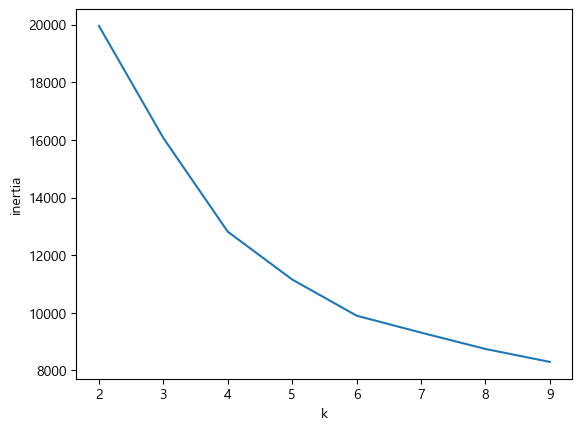

In [167]:
inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=26)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [93]:
# k를 6으로 넣고 k-means 모델 생성
model = KMeans(n_clusters=6, random_state=26, n_init=10)

In [95]:
# 정규화된 입력변수를 이용해서 모델 학습
model.fit(x_scaled)

KMeans(n_clusters=6, n_init=10, random_state=26)

In [97]:
# 0, 1, 2로 라벨링이 되어 있음
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5])

In [99]:
group = df.copy()

In [101]:
group["cluster"] = model.predict(x_scaled)

In [103]:
group = group.sort_values("cluster").reset_index(drop=True)

In [107]:
group["cluster"].unique()

array([0, 1, 2, 3, 4, 5])

In [109]:
group["cluster"].value_counts()

cluster
3    1770
0    1521
4     670
2     210
1     107
5      42
Name: count, dtype: int64

In [113]:
group.head()

,대여소_ID,주간,시간대,대여건수,반납건수,총이용건수,잔여자전거수,동일대여소대여반납,중구내대여반납,유출량,유입량,cluster
0,ST-187,평일,23,23,17,40,81,0,16,7,5,0
1,ST-194,평일,21,31,38,69,31,2,6,23,18,0
2,ST-194,평일,20,34,30,64,34,1,7,26,22,0
3,ST-194,주말,23,0,3,3,22,0,0,0,2,0
4,ST-194,주말,22,11,8,19,27,0,4,7,1,0


In [111]:
group.columns

Index(['대여소_ID', '주간', '시간대', '대여건수', '반납건수', '총이용건수', '잔여자전거수', '동일대여소대여반납',
       '중구내대여반납', '유출량', '유입량', 'cluster'],
      dtype='object')

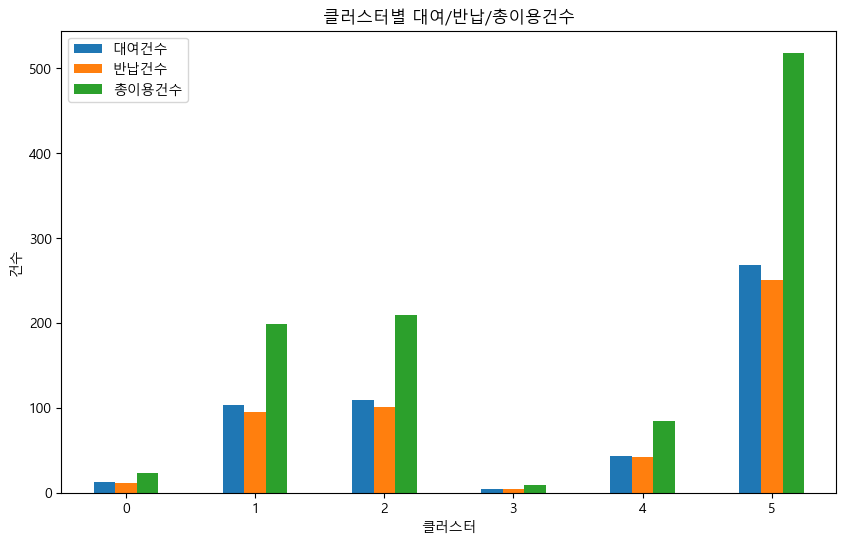

In [169]:
# 클러스터별 대여건수, 반납건수, 총이용건수 평균 시각화
cluster_data = group.groupby("cluster")[["대여건수", "반납건수", "총이용건수"]].mean()
cluster_data = group.groupby("cluster")[["대여건수", "반납건수", "총이용건수"]].mean()

cluster_data.plot(kind="bar", figsize=(10, 6))
plt.title("클러스터별 대여/반납/총이용건수")
plt.xlabel("클러스터")
plt.ylabel("건수")
plt.xticks(rotation=0)
plt.show()

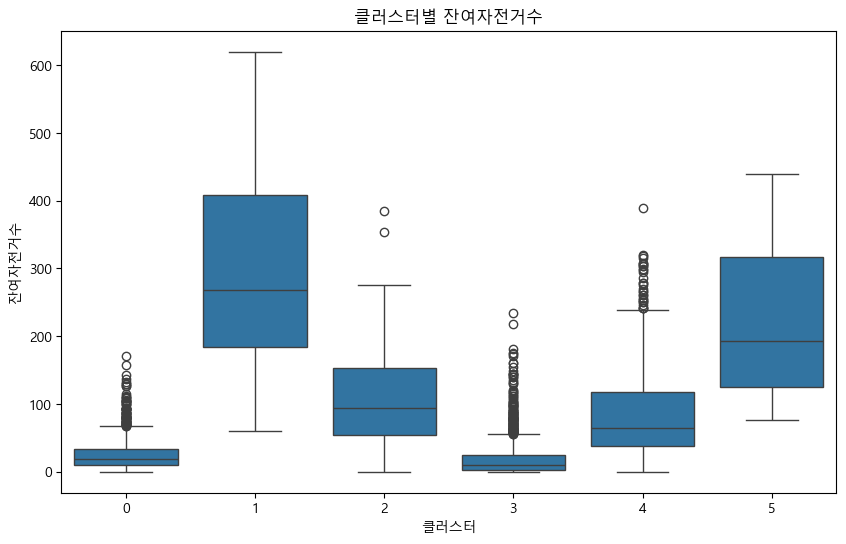

In [171]:
# 클러스터별 잔여자전거수 시각화
plt.figure(figsize=(10, 6))

sns.boxplot(data=group, x="cluster", y="잔여자전거수")
plt.title("클러스터별 잔여자전거수")
plt.xlabel("클러스터")
plt.ylabel("잔여자전거수")

plt.show()

In [173]:
cluster_means = group.groupby("cluster")[select].mean(numeric_only=True)
all_mean = group[select].mean().to_frame().T

In [175]:
all_mean

,시간대,대여건수,반납건수,잔여자전거수,동일대여소대여반납,중구내대여반납,유출량,유입량
0,11.5,23.287269,22.100694,44.269907,1.463889,9.421296,12.402083,11.212037


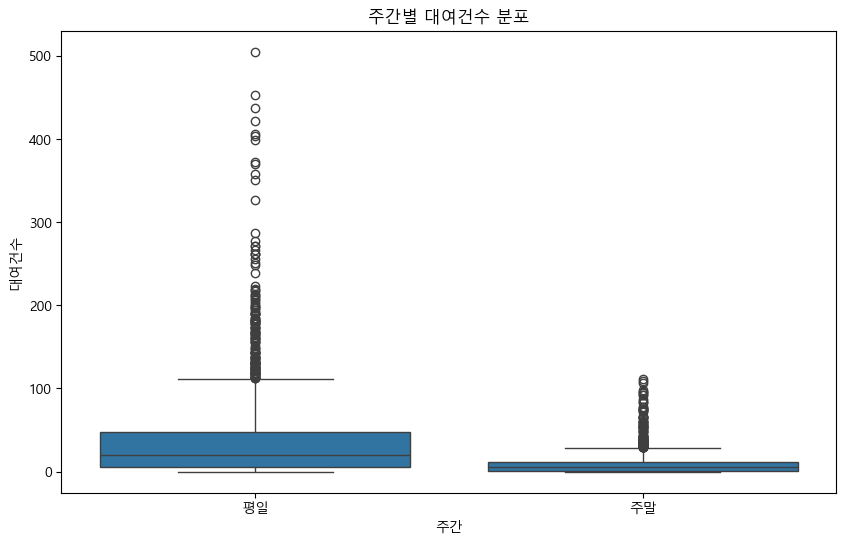

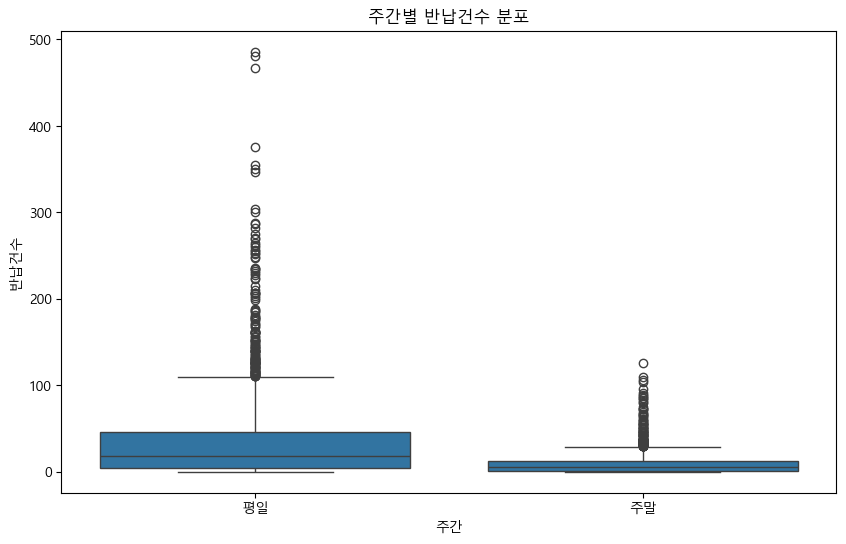

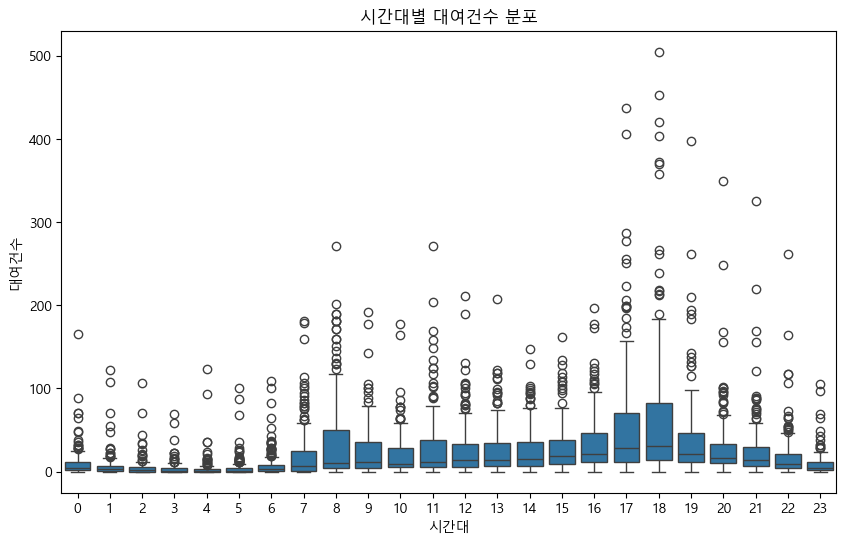

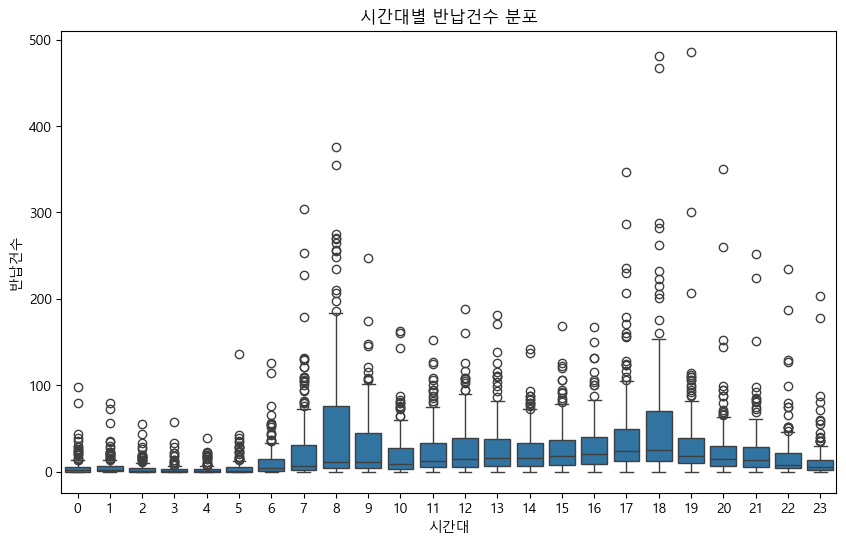

In [185]:
# 주간별 대여건수 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=group, x="주간", y="대여건수")
plt.title("주간별 대여건수 분포")
plt.xlabel("주간")
plt.ylabel("대여건수")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=group, x="주간", y="반납건수")
plt.title("주간별 반납건수 분포")
plt.xlabel("주간")
plt.ylabel("반납건수")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=group, x="시간대", y="대여건수")
plt.title("시간대별 대여건수 분포")
plt.xlabel("시간대")
plt.ylabel("대여건수")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=group, x="시간대", y="반납건수")
plt.title("시간대별 반납건수 분포")
plt.xlabel("시간대")
plt.ylabel("반납건수")
plt.show()